In [43]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import copy

### Data Processing 

In [44]:
x_train = np.array([30, 50, 60, 80, 100]) # x - size of house in mp 
y_train = np.array([70000, 100000, 120000, 150000, 200000]) # y - price of house 

In [45]:
for i, j in zip(x_train , y_train):
    print(i,j)

30 70000
50 100000
60 120000
80 150000
100 200000


In [46]:
len(x_train) , len(y_train)

(5, 5)

In [47]:
x_train , y_train 

(array([ 30,  50,  60,  80, 100]),
 array([ 70000, 100000, 120000, 150000, 200000]))

<function matplotlib.pyplot.show(close=None, block=None)>

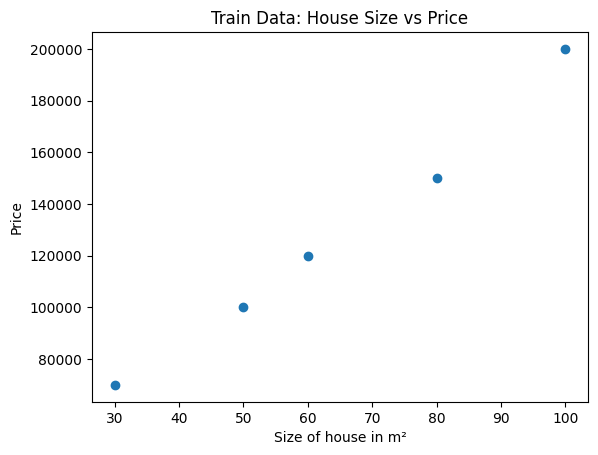

In [48]:
plt.scatter(x_train, y_train)
plt.title("Train Data: House Size vs Price")
plt.xlabel("Size of house in m²") 
plt.ylabel("Price")
plt.show

###  Train 

In [49]:
def compute_cost(x, y, w ,b):
    m = x.shape[0]  
    cost = 0 
    for i in range(0,m):
        f_wb = w * x[i] + b
        cost += (f_wb - y[i])**2
    total_cost = cost / (2 * m)
    return total_cost 
                
        

In [50]:
print(float(compute_cost(x = x_train, y = y_train, w = 5, b = 10) ))

9132481750.0


In [51]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    #partial derivative
    dj_dw = 0 
    dj_db = 0 

    for i in range(0,m):
        # calc function 
        f_wb = w * x[i] + b
        dj_dw += (f_wb - y[i]) * x[i]
        dj_db += (f_wb - y[i])
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

In [52]:
dj_dw, dj_db = compute_gradient(x_train, y_train, w=10, b=1)
print(f"dj_dw = {dj_dw:.2f}, dj_db = {dj_db:.2f}")


dj_dw = -9213136.00, dj_db = -127359.00


In [65]:
def gradient_descent(x, y, w_in, b_in, alpha, numb_iters, cost_function, gradient_function):
    
    #pass by object reference 
    #shallow copy -> still references to the same inner objects.
                            #vs
    #deep copy -> independent clone of the original object
    
    w = copy.deepcopy(w_in)
    b = copy.deepcopy(b_in)

    # cost function eveolution - loss
    J_history = []

    for i in range (0, numb_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b)

        w = w - alpha * dj_dw 
        b = b - alpha * dj_db 

        J_history.append(cost_function(x, y, w, b))
        print(f"Iteration: {i} | Cost: {J_history[i]:.4f} | dj_dw: {dj_dw:.4f} | dj_db: {dj_db:.4f} | w: {w:.4f} | b: {b:.4f}")

    return w, b, J_history
    
    
    

In [84]:
w_init = 0 
b_init = 0 

iterations = 20  #training steps
alpha = 3.0e-4 #slow learning -> small learning rate , a bigger value => overshooting 

w_final, b_final ,J_history = gradient_descent(x=x_train, y=y_train,
                                               alpha=alpha,
                                               w_in=w_init,
                                               b_in=b_init,
                                               numb_iters=iterations,
                                               cost_function=compute_cost,
                                               gradient_function=compute_gradient)
print(f"(w,b) found by gradient descent ({w_final:.4f}, {b_final:.4f})")


Iteration: 0 | Cost: 1516077310.0800 | dj_dw: -9260000.0000 | dj_db: -128000.0000 | w: 2778.0000 | b: 38.4000
Iteration: 1 | Cost: 263575550.7500 | dj_dw: 3743497.6000 | dj_db: 49830.4000 | w: 1654.9507 | b: 23.4509
Iteration: 2 | Cost: 58880942.8087 | dj_dw: -1513329.7741 | dj_db: -22059.7030 | w: 2108.9497 | b: 30.0688
Iteration: 3 | Cost: 25427599.2570 | dj_dw: 611808.7750 | dj_db: 7002.8465 | w: 1925.4070 | b: 27.9679
Iteration: 4 | Cost: 19959911.8650 | dj_dw: -247305.1998 | dj_db: -4745.9828 | w: 1999.5986 | b: 29.3917
Iteration: 5 | Cost: 19065870.6586 | dj_dw: 100002.4236 | dj_db: 3.7008 | w: 1969.5979 | b: 29.3906
Iteration: 6 | Cost: 18919292.3714 | dj_dw: -40401.0502 | dj_db: -1916.3468 | w: 1981.7182 | b: 29.9655
Iteration: 7 | Cost: 18894870.6583 | dj_dw: 16358.8181 | dj_db: -1140.0717 | w: 1976.8105 | b: 30.3075
Iteration: 8 | Cost: 18890412.8124 | dj_dw: -6587.0731 | dj_db: -1453.8190 | w: 1978.7866 | b: 30.7437
Iteration: 9 | Cost: 18889217.6608 | dj_dw: 2689.0909 | dj_

### Metrics 

In [85]:
J_history

[np.float64(1516077310.0799985),
 np.float64(263575550.75001973),
 np.float64(58880942.8086731),
 np.float64(25427599.256992),
 np.float64(19959911.864977896),
 np.float64(19065870.658561178),
 np.float64(18919292.371351305),
 np.float64(18894870.658259764),
 np.float64(18890412.812352978),
 np.float64(18889217.66078383),
 np.float64(18888555.760492597),
 np.float64(18887981.043438334),
 np.float64(18887420.609509654),
 np.float64(18886862.544767972),
 np.float64(18886304.90213696),
 np.float64(18885747.36340665),
 np.float64(18885189.876569975),
 np.float64(18884632.433124974),
 np.float64(18884075.031679444),
 np.float64(18883517.672003355)]

<function matplotlib.pyplot.show(close=None, block=None)>

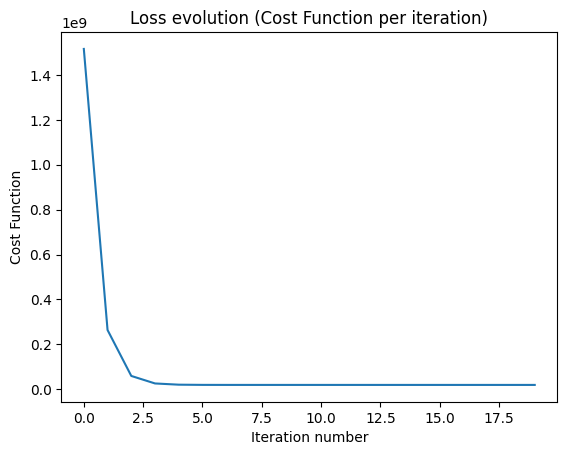

In [86]:
plt.plot(J_history)
plt.title("Loss evolution (Cost Function per iteration)")
plt.xlabel("Iteration number")
plt.ylabel("Cost Function")
plt.show

In [108]:
#measures how well a regression model explains the variance in the target variable
def r2_score(y, y_):
    num = np.sum((y - y_)**2)
    denom = np.sum((y - y.mean())**2)
    score = 1 - num/denom 
    return score 
    

In [109]:
y_ = [w_final * i + b_final for i in x_train]

In [110]:
y_

[np.float64(59379.87227105263),
 np.float64(98942.9642045718),
 np.float64(118724.51017133139),
 np.float64(158287.60210485058),
 np.float64(197850.69403836975)]

In [111]:
r2_score(y_train , y_) # (0,1) -> bigger is better 

np.float64(0.9808871278623448)

### Prediction


In [ ]:
x_train = np.array([30, 50, 60, 80, 100]) # x - size of house in mp 
y_train = np.array([70000, 100000, 120000, 150000, 200000]) # y - price of house 

In [88]:
size_of_house = 20
print(f"A house with size {size_of_house} m² has a price of: {w_final * size_of_house + b_final:.4}$")

A house with size 20 m² has a price of: 3.96e+04$


In [89]:
size_of_house = 30
print(f"A house with size {size_of_house} m² has a price of: {w_final * size_of_house + b_final:.4}$")

A house with size 30 m² has a price of: 5.938e+04$


In [90]:
size_of_house = 50
print(f"A house with size {size_of_house} m² has a price of: {w_final * size_of_house + b_final:.4}$")

A house with size 50 m² has a price of: 9.894e+04$


In [91]:
size_of_house = 60
print(f"A house with size {size_of_house} m² has a price of: {w_final * size_of_house + b_final:.4}$")

A house with size 60 m² has a price of: 1.187e+05$


In [97]:
size_of_house = 100
print(f"A house with size {size_of_house} m² has a price of: {w_final * size_of_house + b_final:.4}$")

A house with size 100 m² has a price of: 1.979e+05$


<function matplotlib.pyplot.show(close=None, block=None)>

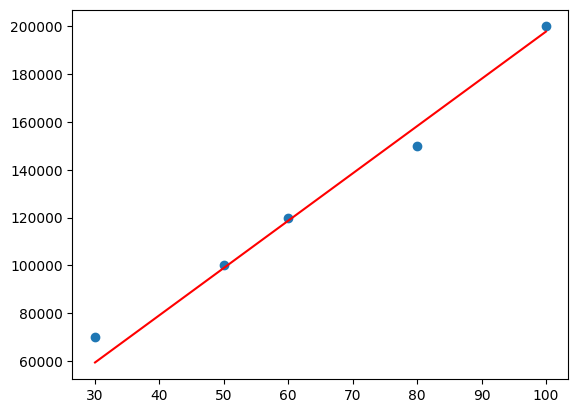

In [98]:
plt.scatter(x_train, y_train)
plt.plot(x_train, w_final * x_train + b_final, c='r')
plt.show
        